In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from datetime import datetime
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (20,5)

<h2>Data Cleansing
    <h4>In this section, we import the dataset and correct any problems that could interfere with our anaylisis. This includes: <br> 
        <ul>
<li>Removing unnecessary columns</li>
<li>Ensuring that missing values are filled and extreme outliers are recognized</li>
<li>Checking that data types fit our needs</li>
        </ul>

In [215]:
path="/Users/ben/Desktop/supermarket_sales - Sheet1.csv"
ds=pd.read_csv(path)
print(ds.head())
print(ds.dtypes)

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity  Tax 5%   Total       Date  \
0       Health and beauty       74.69         7   26.14  548.97   1/5/2019   
1  Electronic accessories       15.28         5    3.82   80.22   3/8/2019   
2      Home and lifestyle       46.33         7   16.22  340.53   3/3/2019   
3       Health and beauty       58.22         8   23.29  489.05  1/27/2019   
4       Sports and travel       86.31         7   30.21  634.38   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                     4.76         26.14     9.1  
1  10:29         Cash   

In [216]:
ds.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

<h4>There is only 1 'Branch' for each 'City', so we will remove the 'Branch' column as it is redundant. <br> We will remove the 'gross margin percentage' column as well. It has the same value for every row so it does not provide actionable information. <br>The "Tax" column represents a predetermined and un-changeable percentage. So we don't need that column either.

In [217]:
#removes unwanted columns and checks for empty cells
def basic_data_cleansing (cols_to_drop):
    global clean_ds
    clean_ds=ds.drop(cols_to_drop, 1)
    check_na=clean_ds.isna().sum()
    print("New Column List and # of emtpy cells\n\n",check_na)
basic_data_cleansing(['Branch','gross margin percentage','Tax 5%'])


New Column List and # of emtpy cells

 Invoice ID       0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Total            0
Date             0
Time             0
Payment          0
cogs             0
gross income     0
Rating           0
dtype: int64


In [218]:
#converts'Date' and 'Time' to pandas datetime dtype.
clean_ds['Date']=pd.to_datetime(clean_ds['Date'])
clean_ds['Time']=pd.to_datetime(clean_ds['Time'])
print(clean_ds.dtypes)
print(clean_ds.head())


Invoice ID               object
City                     object
Customer type            object
Gender                   object
Product line             object
Unit price              float64
Quantity                  int64
Total                   float64
Date             datetime64[ns]
Time             datetime64[ns]
Payment                  object
cogs                    float64
gross income            float64
Rating                  float64
dtype: object
    Invoice ID       City Customer type  Gender            Product line  \
0  750-67-8428     Yangon        Member  Female       Health and beauty   
1  226-31-3081  Naypyitaw        Normal  Female  Electronic accessories   
2  631-41-3108     Yangon        Normal    Male      Home and lifestyle   
3  123-19-1176     Yangon        Member    Male       Health and beauty   
4  373-73-7910     Yangon        Normal    Male       Sports and travel   

   Unit price  Quantity   Total       Date                Time      Payment  \
0       

<h1>Insights 
        

In [228]:
#Creates a function that will be used to explore correlations between sales (sum and average) and transaction variables.
def groupfunc (c1, c2, calc):
    return(pd.DataFrame(clean_ds.groupby([c1])[c2].agg(calc)))

            Total
Gender           
Female  167882.93
Male    155083.82
                 Total
Payment               
Cash         112206.57
Credit card  100767.07
Ewallet      109993.11
                   Total
Customer type           
Member         164223.44
Normal         158743.31
               Total
City                
Mandalay   106197.67
Naypyitaw  110568.71
Yangon     106200.37
                           Total
Product line                    
Electronic accessories  54337.53
Fashion accessories     54305.89
Food and beverages      56144.84
Health and beauty       49193.74
Home and lifestyle      53861.91
Sports and travel       55122.83


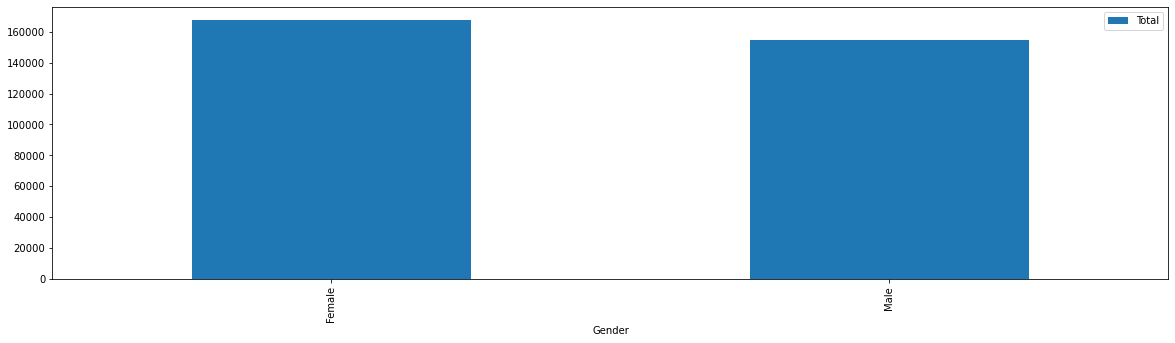

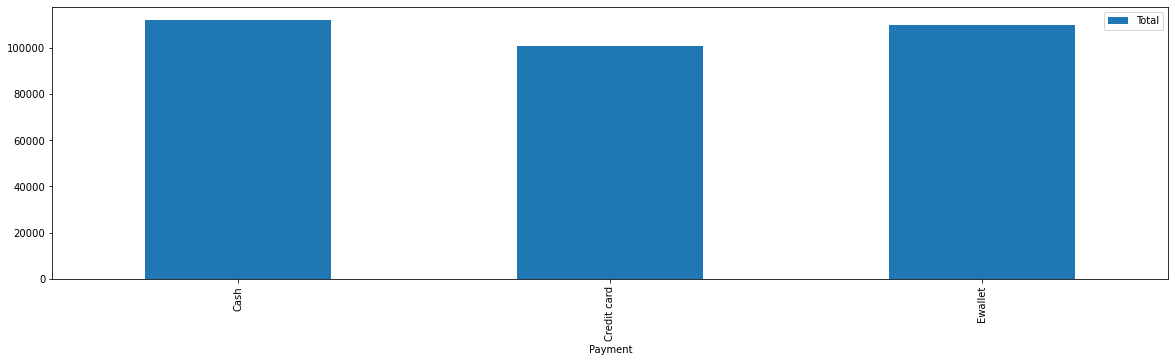

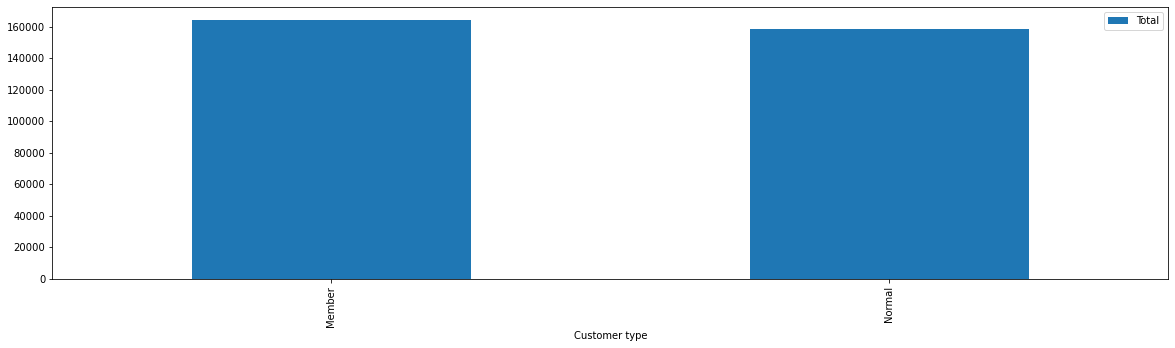

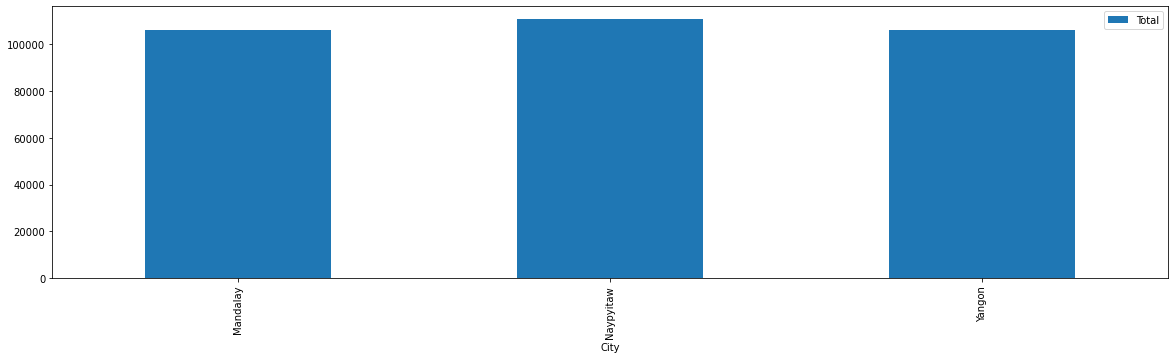

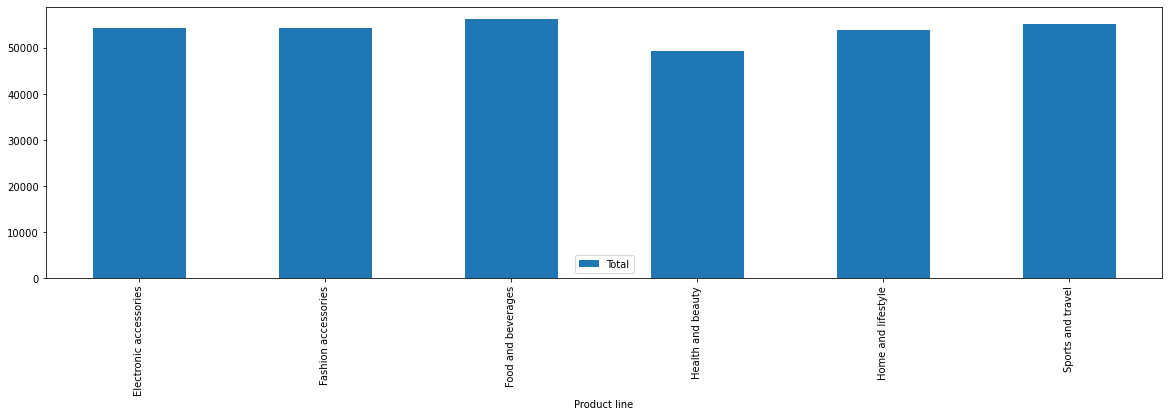

In [234]:
cats_to_plot=['Gender','Payment','Customer type','City', 'Product line']
for col in cats_to_plot:
    print(groupfunc(col,'Total','sum'))
    (groupfunc(col,'Total','sum')).plot.bar()

In [231]:
#calcualates % of total for a category
def pct_of_total (x):
    group=clean_ds.groupby([x])['Total'].agg('sum')
    group_pct=((group/(clean_ds['Total'].agg('sum')))*100).round(2)
    return(pd.DataFrame(group_pct))


        Total
Gender       
Female  51.98
Male    48.02
             Total
Payment           
Cash         34.74
Credit card  31.20
Ewallet      34.06
               Total
Customer type       
Member         50.85
Normal         49.15
           Total
City            
Mandalay   32.88
Naypyitaw  34.24
Yangon     32.88
                        Total
Product line                 
Electronic accessories  16.82
Fashion accessories     16.81
Food and beverages      17.38
Health and beauty       15.23
Home and lifestyle      16.68
Sports and travel       17.07


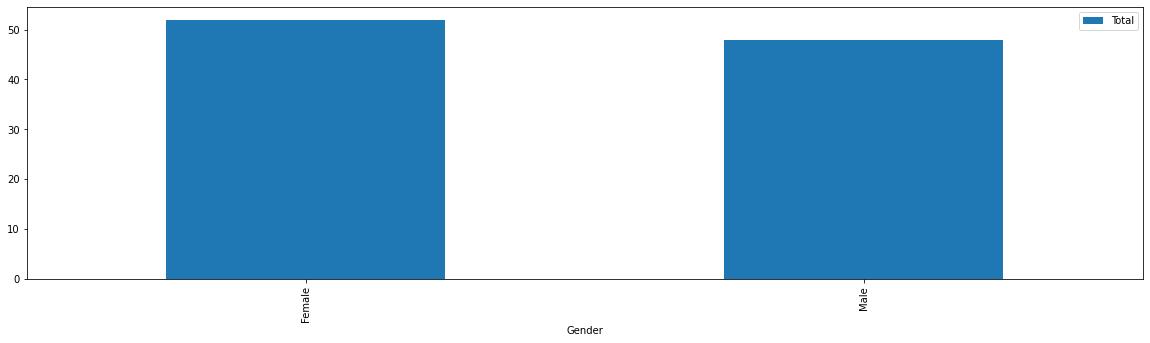

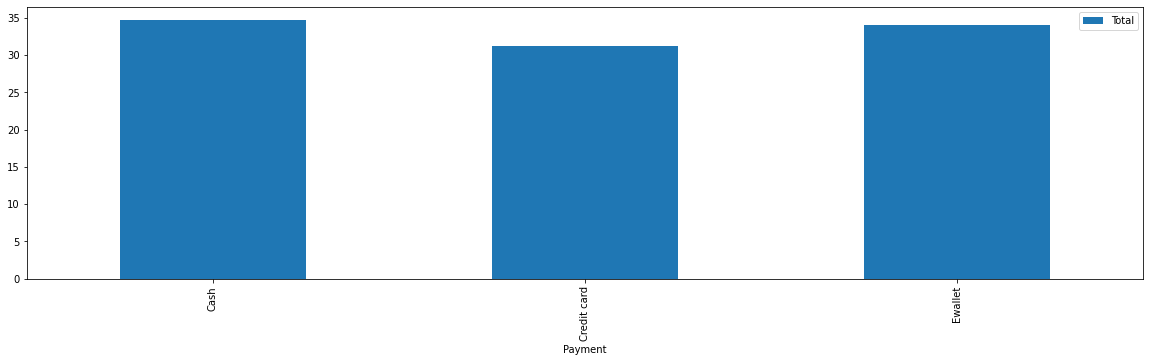

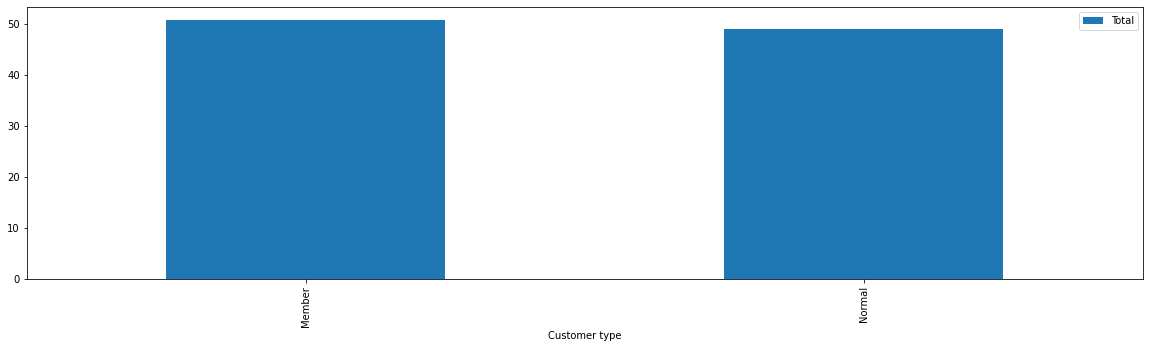

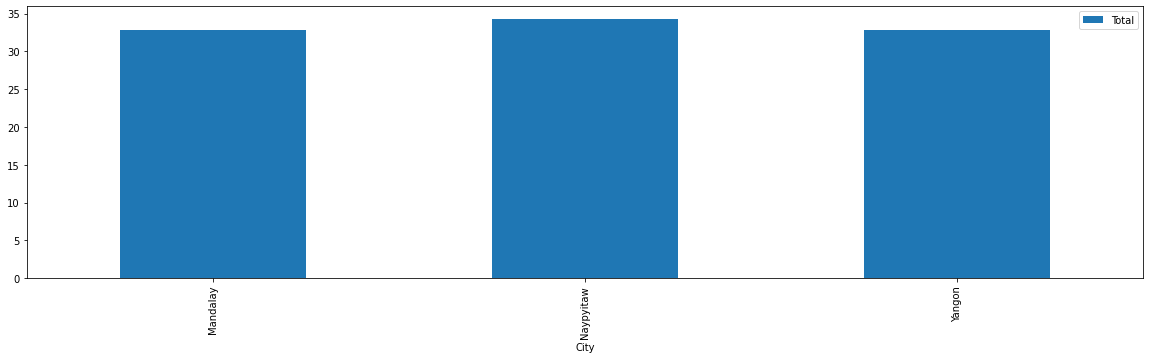

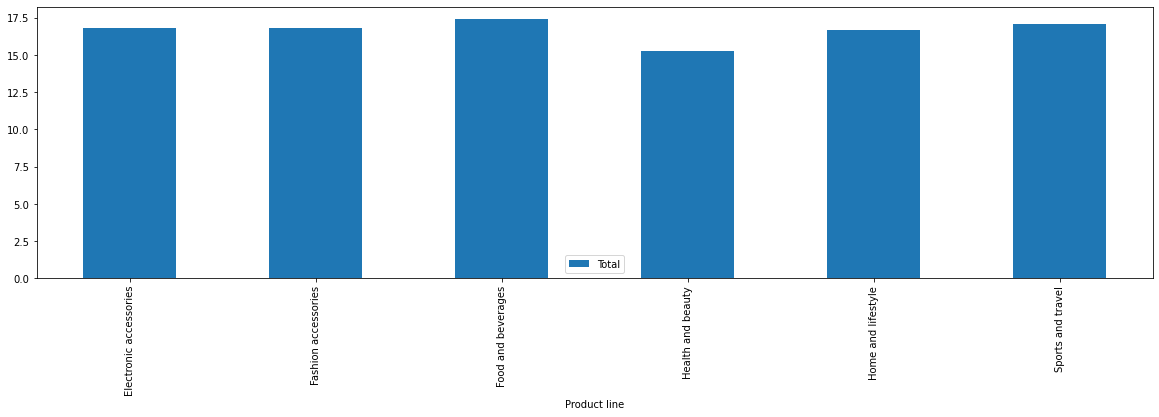

In [233]:
#loops through cstegories for % of total sales.
cats_to_plot=['Gender','Payment','Customer type','City', 'Product line']
for i in cats_to_plot:
    print(pd.DataFrame(pct_of_total (i)))
    (pct_of_total (i)).plot.bar()


<h2> -These bar plots above reveal small differences between sales for each catergory. Whether we look at total sales or percent of total sales. So, to gain actionable insight into sales trends we will dig further into sales over time as well as comparing the variables with each other. 

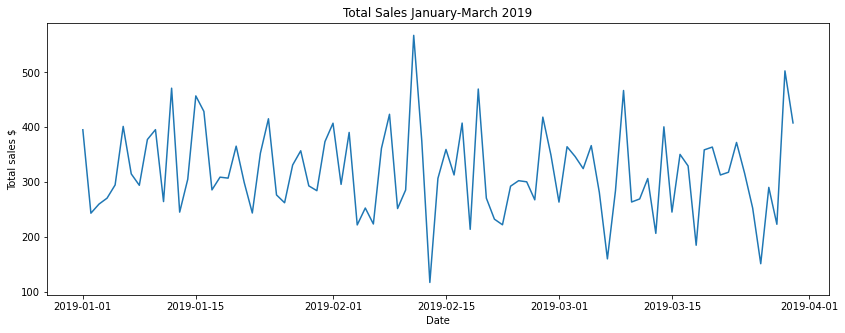

In [225]:
sales_by_date=groupfunc('Date','Total','mean')
plt.figure(figsize=(14, 5))
total_sales_line = plt.plot(sales_by_date)
plt.title('Total Sales January-March 2019')
plt.xlabel('Date')
plt.ylabel('Total sales $')
plt.show()

<h3>The line plot above does not suggest any clear trend in sales over the three month time period.
   <br>So lets see if grouping sales by product line gives any new results.

Text(0.5, 1.0, 'Total sales grouped by product line')

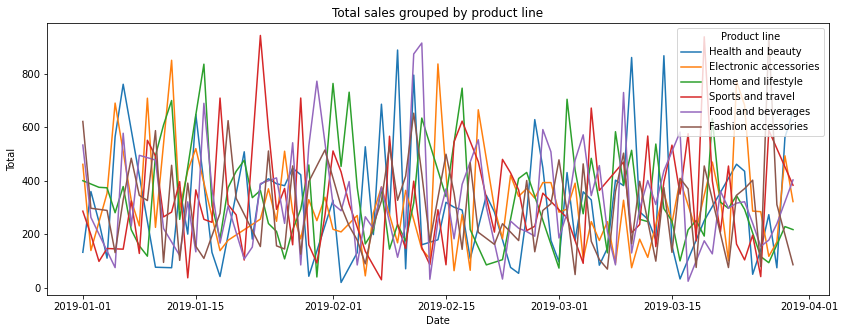

In [30]:
plt.figure(figsize=(14, 5))
sns.lineplot(x="Date", y="Total", hue="Product line", data=clean_ds, ci=None)
plt.title('Total sales grouped by product line')


<h3> The time series is too messy at this level of detail. So we need to aggregate. 
Below we create a new column for the hour.

In [31]:
#Extracts the hour element of the datetime column into a new column
#sorts sales totals by hour
clean_ds['hour']=clean_ds['Time'].dt.hour
df_sort_hours=clean_ds.sort_values(by=['hour'], ascending=True)
print(df_sort_hours.head())

      Invoice ID       City Customer type  Gender        Product line  \
681  320-85-2052   Mandalay        Normal  Female   Sports and travel   
760  842-40-8179   Mandalay        Member  Female  Food and beverages   
507  862-17-9201   Mandalay        Normal  Female  Food and beverages   
773  471-06-8611  Naypyitaw        Normal  Female  Food and beverages   
787  790-38-4466  Naypyitaw        Normal  Female   Health and beauty   

     Unit price  Quantity     Total       Date                Time  \
681       34.81         1   36.5505 2019-01-14 2021-09-24 10:11:00   
760       77.20        10  810.6000 2019-02-11 2021-09-24 10:38:00   
507       84.05         6  529.5150 2019-01-29 2021-09-24 10:48:00   
773       52.42         1   55.0410 2019-02-06 2021-09-24 10:22:00   
787       10.99         5   57.6975 2019-01-23 2021-09-24 10:18:00   

         Payment    cogs  gross income  Rating  hour  
681  Credit card   34.81        1.7405     7.0    10  
760  Credit card  772.00      

<h3> With the new 'hour' column, we can now get useful results when plotting sales throughout the day for each category.

Text(0.5, 1.0, 'Average sales by hour')

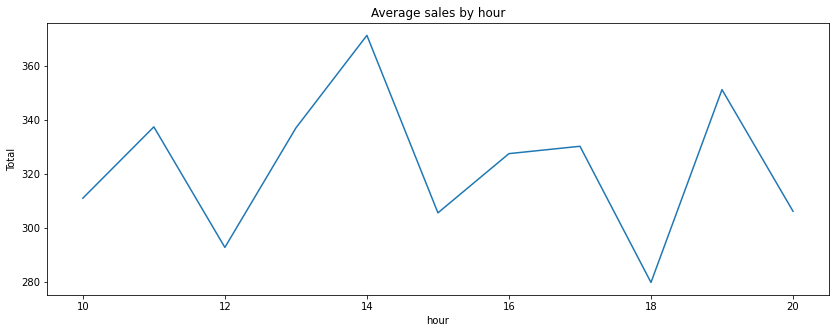

In [32]:
plt.figure(figsize=(14, 5))
sns.lineplot(x="hour", y="Total", data=df_sort_hours, ci=None)
plt.title('Average sales by hour')


<ul>
<li>This line reveals that overall sales peak around 2:00 in the afternoon and drop off around 12:00 noon and 6:00 pm.</li>
<li>This information might suggest that we should focus high levels of staff around busy hours.</li>
<li>The line could also suggest that we should develop a marketing strategy to bring more customers in at noon and 6:00pm</li>
<li>But more information is needed before we make any decisions so we will drill down one level to look at hourly sales for each category available in the data.</li>
    


In [33]:
#function to plot categories by hourly averages
def hourly_avg_line (param):
    plt.figure(figsize=(14, 5))
    sns.lineplot(x="hour", y="Total", hue=param, data=df_sort_hours, ci=None)
    plt.title('Average hourly sales by ' + str(param))


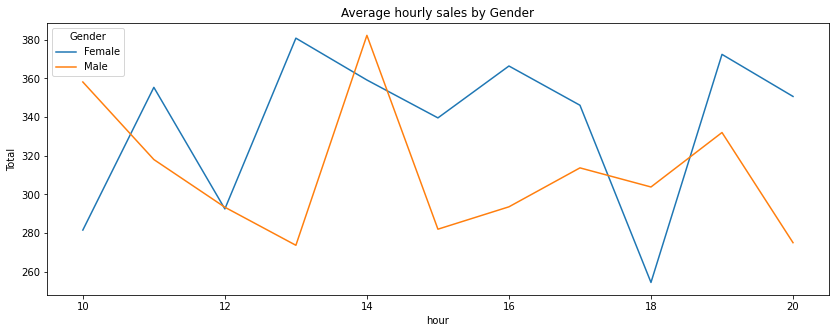

In [34]:
hourly_avg_line('Gender')

<li>As we saw in the bar charts previously, females spend slightly more than males overall.</li>
<li>Males spend the most around 10:00 and 2:00 pm. If we are promoting products that males tend to buy more of, we should focus those in store promotions around these times.</li>
<li>Females spending is strong through out the day, so to increae sales, males represent a greater opportunity.</li>

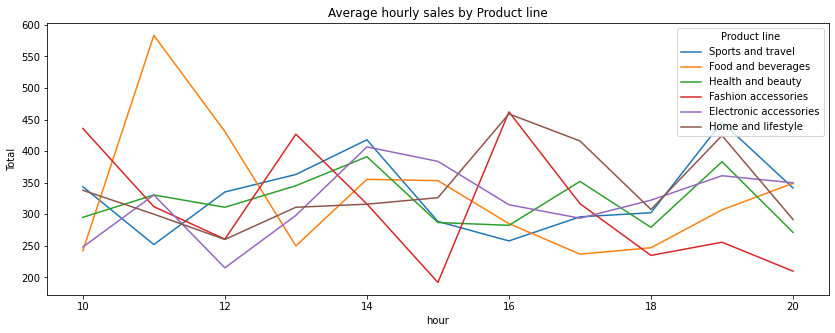

In [35]:
hourly_avg_line('Product line')

<li>For product lines, the greatest opoortunity appears to be in food and beverages.</li>
<li>We can exploit their clear popularity around 11:00 am to increase offerings, offer higher priced items and provide better service to generate more repeat customers. </li>
<li>We could also cross promote with other product lines, by offering a combination deal or coupons for other products if purchased at the same time.</li>

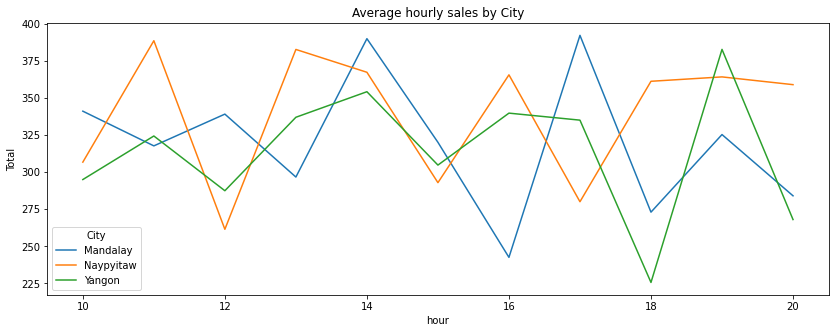

In [36]:
hourly_avg_line('City')

<li>Naypyitaw and Yangon share similar trends in sales over the avergae day, while Napypyitaw's sales line is more volatile.</li>
<li>However, Mandalay's sales often peak or drop at opposite times to the other two.</li>
<li>There could be something about the demographics of Mandalay that is causing these hourly sales trends. And it would be useful to discover what the difference is.</li>

<h4> Below, we group by main categories and a subcategories in order to see correlations between these variables

In [166]:
#function to create bar plots for combinations of categorical variables

def category_combos (main, sub):
    pd.options.display.precision = 2
    plt.figure(figsize=(14, 10))
    df=pd.DataFrame(clean_ds.groupby([main, sub])['Total'].agg('mean').sort_values(ascending=False)
)
    df=df.reset_index()
    sns.barplot(x="Total", y=main, hue=sub, data=df, ci=None)
    plt.title('average '+ str(main) + ' sales by ' + str(sub))
    
    crosstab=pd.crosstab(df[main],df[sub],df['Total'], aggfunc='mean').round(2)
    return(crosstab.style.background_gradient(cmap='Blues'))
    #print(df)

Gender,Female,Male
Product line,,
Electronic accessories,322.64,316.69
Fashion accessories,317.06,291.08
Food and beverages,368.57,273.50
Health and beauty,290.02,348.10
Home and lifestyle,380.21,294.14
Sports and travel,324.71,340.36


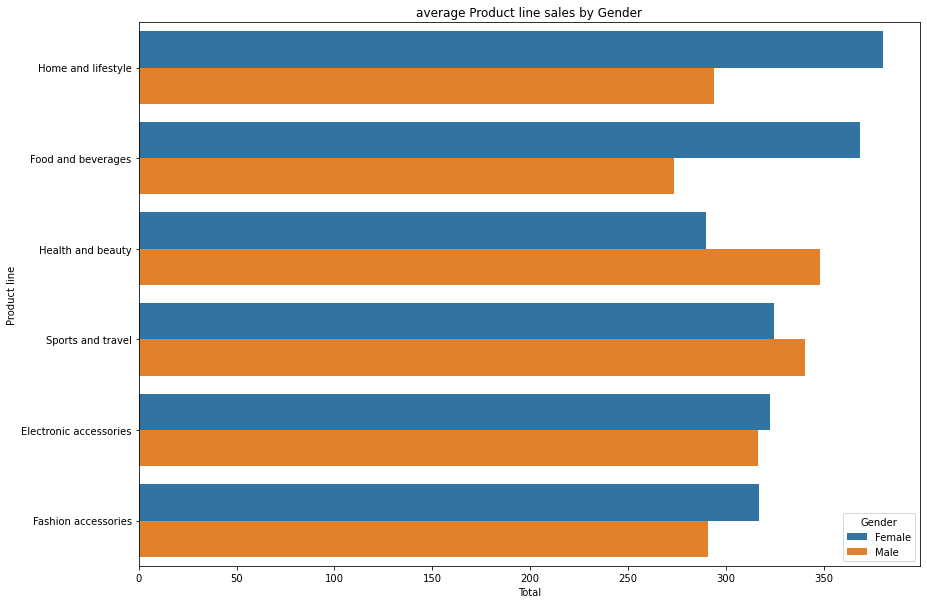

In [167]:
category_combos ('Product line','Gender')

<li>Women spend significantly more on food and beverage as well as home and lifestyle.</li>
<li>Men spend significantly more on health and beauty</li>
<li>We can combine this insight with the hourly and daily sales trends we see in the lione charts. Giving us a clear picture of what will be in demand at certain times and days. For example we know that men spend the most around 2:00 on Thursdays and Saturdays. So we should provide extra staff and extra, high priced products in the health and beauty department at those times.</li>
<li> Similarly, women spend the most between 1:00-4:00 pm and 7:00 pm on Tuesdays and Fridays. at these times we should provide extra staff and display high priced products.</li>
   

City,Mandalay,Naypyitaw,Yangon
Product line,,,
Electronic accessories,310.03,344.89,305.29
Fashion accessories,264.73,331.69,320.25
Food and beverages,304.30,360.10,295.92
Health and beauty,376.99,319.53,268.04
Home and lifestyle,350.98,308.79,344.88
Sports and travel,322.39,350.27,328.35


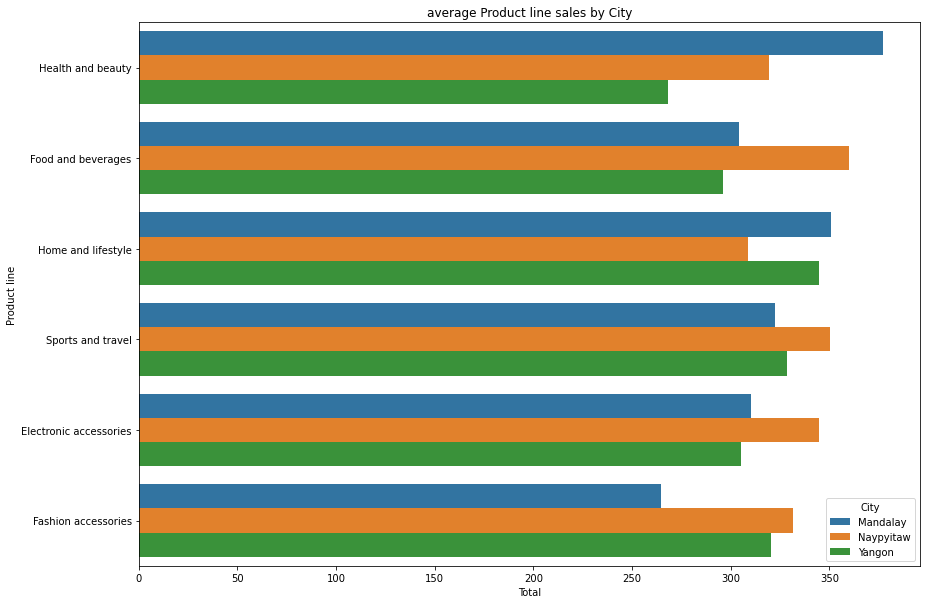

In [169]:
category_combos ('Product line', 'City')

<li>Mandalay is the best seller of health and beauty products by far. </li>
<li>We should look at the health and beauty departments of the other two stores and determine if they are missing opportunitites to inccrease sales. What san they learn from Mandalay?</li>

Customer type,Member,Normal
City,,
Mandalay,325.48,314.33
Naypyitaw,336.58,337.66
Yangon,321.18,303.83


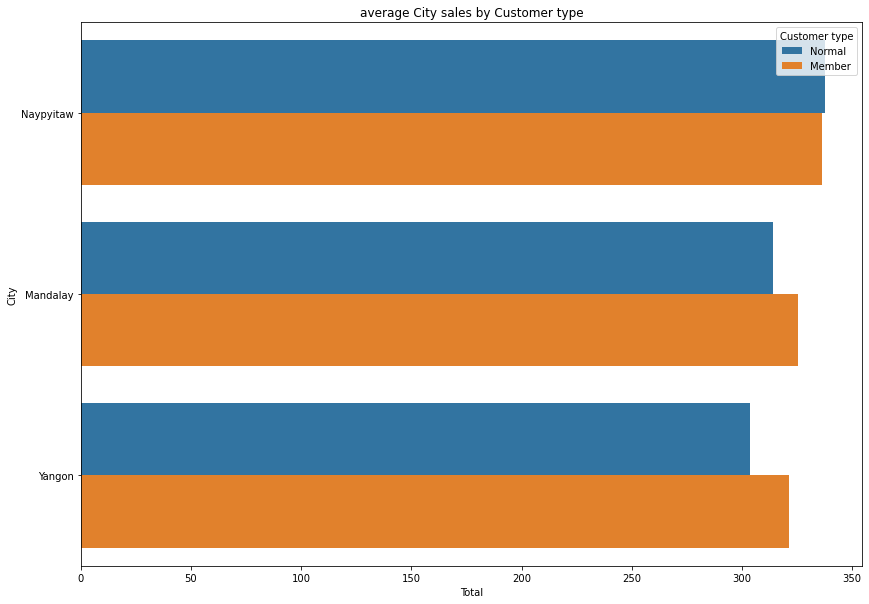

In [171]:
category_combos ('City','Customer type')

<li>In 2 out of 3 of these cities, Members are actually spending less than non-members.</li>
<li>We should take a hard look at the membership program and determine what the cost is and if there is any reason to keep it.</li>

<h3> The data set does not include the days of the week. So we will extract that from the date column here. Then we can see sales trends over the week for each variable.

In [241]:
#Creates a new column for day of the week.
clean_ds['day_of_week']=clean_ds['Date'].dt.day_name()
print(clean_ds['day_of_week'])

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: day_of_week, Length: 1000, dtype: object


             Unit price  Quantity   Total    cogs  gross income  Rating
day_of_week                                                            
Monday            57.73      5.10  303.19  288.75         14.44    7.15
Tuesday           54.84      5.46  325.84  310.32         15.52    7.00
Wednesday         53.76      5.59  305.81  291.25         14.56    6.81
Thursday          56.96      5.47  328.62  312.97         15.65    6.89
Friday            55.10      5.45  316.02  300.97         15.05    7.08
Saturday          56.91      5.60  342.20  325.90         16.30    6.90
Sunday            54.52      5.85  334.27  318.35         15.92    7.01


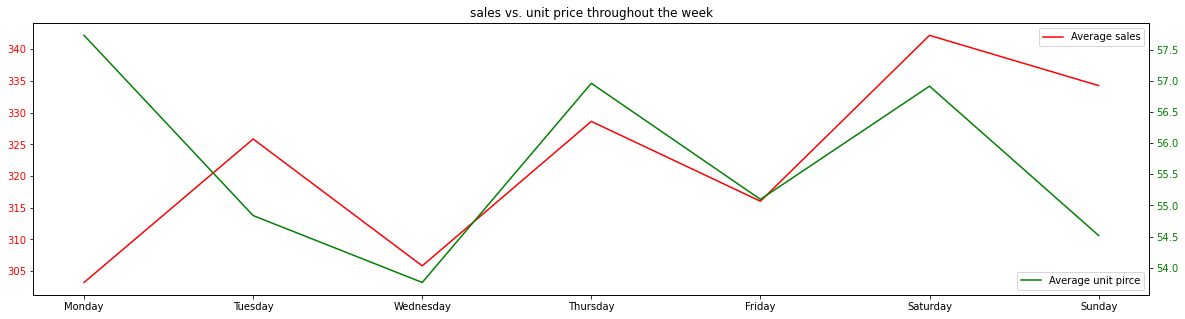

In [242]:
#defines ordered list variable to sort days of week.
#defines a new dataframe grouped by day of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday = pd.DataFrame(clean_ds.groupby(['day_of_week']).mean().reindex(days))
print(df_weekday)
#plt.plot(cats, 'Total', data = df_weekday)
fig, ax = plt.subplots()

#plots sales and unit price on a shared x axis. 
l1=ax.plot(days, df_weekday['Total'], color='red', label='Average sales')
ax.tick_params(axis='y', labelcolor='red')
ax.legend(loc='upper right')
ax2=ax.twinx()
l2=ax2.plot(days, df_weekday['Unit price'], color='green', label='Average unit pirce')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='lower right')
ax.set_title('sales vs. unit price throughout the week')
plt.show()

<h4>It is clear that customers are buying more expensive items on Mondays, and yet it is our lowest average sales day. On the other hand, on Sundays, customers are buying larger quantities of low priced items, leading to high average total sales. This trend suggests that focusing marketing efforts, store layout, and offerings on increasing volume rather than price would generate higher profits in the long term. 

In [243]:
#function to plot category averages over the week
def weekplot (param):
    pd.options.display.precision = 2
    df_sales_by_day=pd.DataFrame(clean_ds.groupby(['day_of_week', param])['Total'].agg('mean'))
    df_sales_by_day=df_sales_by_day.reset_index()
    df_sales_by_day['day_of_week']=pd.Categorical(df_sales_by_day['day_of_week'], categories=days, ordered = True)
    df_sales_by_day.sort_values('day_of_week',inplace=True)
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(x='day_of_week', y="Total", hue=param, data=df_sales_by_day,ci=None)
    plt.title('Average sales by '+ str(param))
    plt.show()
    
    crosstab=pd.crosstab(df_sales_by_day['day_of_week'],df_sales_by_day[param],df_sales_by_day['Total'], aggfunc='mean')
    return(crosstab.style.background_gradient(cmap='Reds'))


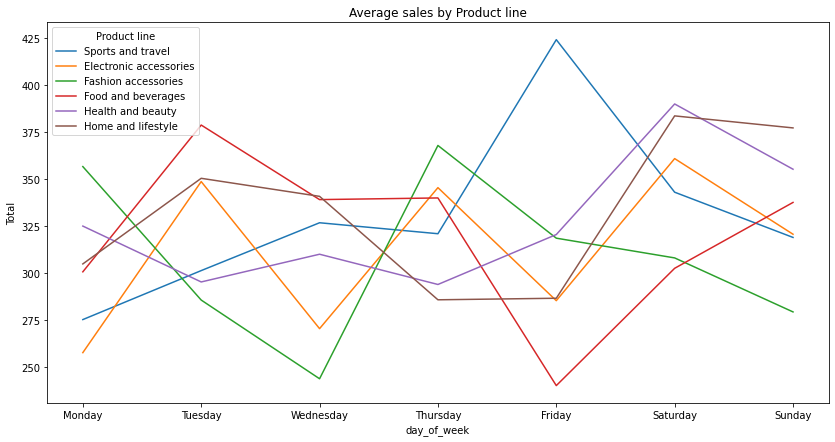

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
day_of_week,,,,,,
Monday,257.48,356.64,300.56,324.93,304.77,275.10
Tuesday,348.65,285.51,378.78,295.16,350.40,301.21
Wednesday,270.27,243.56,339.05,309.93,340.78,326.71
Thursday,345.42,367.90,339.93,293.81,285.65,320.86
Friday,285.19,318.49,239.92,320.42,286.48,424.29
Saturday,360.90,307.97,302.43,390.02,383.67,342.99
Sunday,320.59,279.19,337.54,355.24,377.26,318.88


In [244]:
weekplot ('Product line')

<li>We can see here what day that sales peak for every product line</li>
<li>On any low sales days, we can save money by limiting our inventory</li>
<li> On any high sales days, we can promote new items and increase inventory</li>
<li> By combining this daily sales chart with the hourly sales by product, we can develop a very detailed picture of the exact days and hours that each product will be in demand.</li>

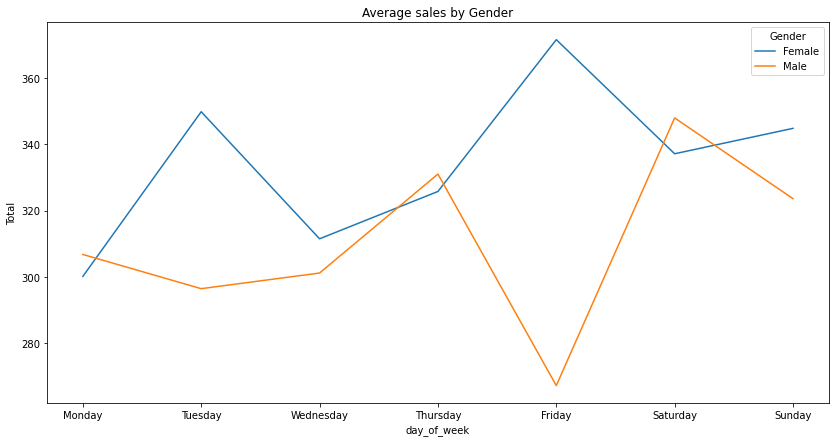

Gender,Female,Male
day_of_week,,
Monday,300.18,306.79
Tuesday,349.79,296.48
Wednesday,311.51,301.20
Thursday,325.77,331.01
Friday,371.50,267.28
Saturday,337.13,347.93
Sunday,344.79,323.59


In [247]:
weekplot ('Gender')

<li> By combining this daily sales chart with the hourly sales by gender and product line by gender charts, we can develop a very detailed picture of the exact days and hours that each gender will be in our stores.</li>

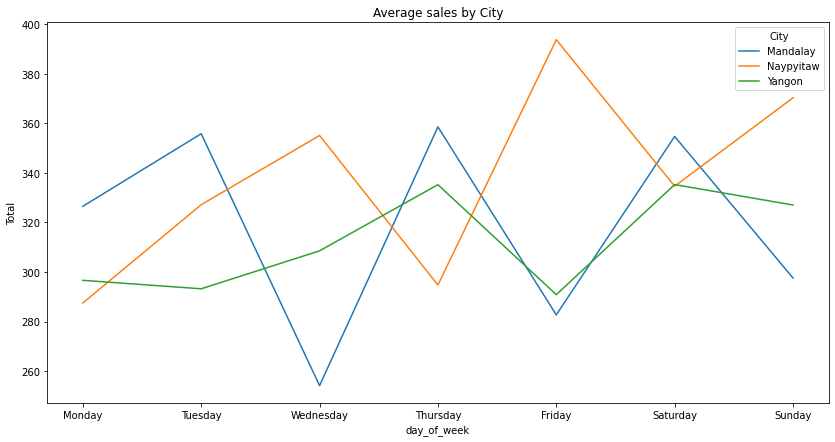

City,Mandalay,Naypyitaw,Yangon
day_of_week,,,
Monday,326.53,287.51,296.65
Tuesday,355.83,327.18,293.24
Wednesday,254.15,355.12,308.55
Thursday,358.61,294.76,335.27
Friday,282.70,393.81,290.88
Saturday,354.74,334.65,335.31
Sunday,297.58,370.34,327.05


In [246]:
weekplot ('City')

<li> By combining this daily sales chart with the hourly sales by city and product line by city charts, we can develop a very detailed picture of the exact days and hours that each store will be the most busy or slow.</li>